<a href="https://www.kaggle.com/code/koheimuramatsu/toxic-text-detection?scriptVersionId=115287510" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h2 style="text-align:center;font-size:200%;">
    <b>Toxic Text Detection</b>
</h2>
<h3  style="text-align:center;">Keywords : 
    <span style="border-radius:7px;background-color:limegreen;color:white;padding:7px;">NLP</span>
    <span style="border-radius:7px;background-color:limegreen;color:white;padding:7px;">EDA</span>
    <span style="border-radius:7px;background-color:limegreen;color:white;padding:7px;">Text Mining</span>
    <span style="border-radius:7px;background-color:limegreen;color:white;padding:7px;">PyTorch</span>
</h3>

<hr>

<a id='top'></a>
<h2 style="font-size:150%;"><span id='top'>Table of Contents</span></h2>
<blockquote>
    <ol>
        <li><a href="#Overview">Overview</a></li>
        <li><a href="#Preparation">Preparation</a></li>
        <li><a href="#Data-Load">Data Load</a></li>
        <li><a href="#Pre-Processing">Pre-Processing</a></li>
        <li><a href="#EDA">EDA</a></li>
        <ul>
            <li><a href="#Sincere/Insincere-Distribution">Sincere/Insincere Distribution</a></li>
            <li><a href="#Word-Length-Distribution">Word Length Distribution</a></li>
            <li><a href="#Sentence-Distribution">Sentence Distribution</a></li>
            <li><a href="#Punctuation-Distribution">Punctuation Distribution</a></li>
            <li><a href="#Word-Frequencies">Word Frequencies</a></li>
            <li><a href="#WordCloud">WordCloud</a></li>
        </ul>
        <li><a href="#Modeling">Modeling</a></li>
        <ul>
            <li><a href="#Model-Settings">Model Settings</a></li>
            <li><a href="#Data-Preparation">Data Preparation</a></li>
            <li><a href="#Training">Training</a></li>
            <li><a href="#Evaluation">Evaluation</a></li>
        </ul>
        <li><a href="#Conclusion">Conclusion</a></li>
        <li><a href="#References">References</a></li>
        <li><a href="#Submission">Submission</a></li>
    </ol>
</blockquote>

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">Overview</div>
## About the Dataset
- Questions in [Quora](https://www.quora.com/)
- Questions is classified in sincere or not
    - characteristics of <b>insincere</b> questions are:
        - Has a non-neutral tone
        - Is disparaging or inflammatory
        - Isn't grounded in reality
        - Uses sexual content (incest, bestiality, pedophilia) for shock value, and not to seek genuine answers
        
## What You Get from this Notebook
- ETL technique
- EDA & Visualization
- Classification Modeling using Pytorch
    - By building a model that can detect insincere questions, we can save time and effort in the operation of Quora and help maintain a safer speech space.

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">Preparation</div>

In [1]:
!pip install pandarallel==1.5 pandas==0.25.3

  Created wheel for pandarallel: filename=pandarallel-1.5.0-cp36-none-any.whl size=17035 sha256=dd1baa2ade0cfe5d6f9cff5bd4ba272eec95ee5fb0c4bf008178e2d69cf50176
  Stored in directory: /root/.cache/pip/wheels/b4/a6/ea/b4795933cd55f714cefefa7dc915f90bd37c12fecf6f7a2136
Successfully built pandarallel


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
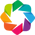

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 80)
import os
import matplotlib.pyplot as plt
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
import string

from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True ,use_memory_fs = False)
import collections
import itertools
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import spacy
from wordcloud import WordCloud
from PIL import Image
import requests
import io

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">Data Load</div>

In [3]:
data_dir = "/kaggle/input"

In [4]:
for dirname, _, filenames in os.walk(f"{data_dir}/quora-insincere-questions-classification"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/quora-insincere-questions-classification/sample_submission.csv
/kaggle/input/quora-insincere-questions-classification/embeddings.zip
/kaggle/input/quora-insincere-questions-classification/train.csv
/kaggle/input/quora-insincere-questions-classification/test.csv


unzip Globe embedding

In [5]:
!unzip $data_dir/quora-insincere-questions-classification/embeddings.zip glove.840B.300d/glove.840B.300d.txt

Archive:  /kaggle/input/quora-insincere-questions-classification/embeddings.zip
  inflating: glove.840B.300d/glove.840B.300d.txt  


In [4]:
train = pd.read_csv(f"{data_dir}/quora-insincere-questions-classification/train.csv")
print('Train Set Shape = {}'.format(train.shape))
train.head(3)

Train Set Shape = (1306122, 3)


qid  \
0  00002165364db923c7e6   
1  000032939017120e6e44   
2  0000412ca6e4628ce2cf   

                                                                     question_text  \
0         How did Quebec nationalists see their province as a nation in the 1960s?   
1  Do you have an adopted dog, how would you encourage people to adopt and not ...   
2              Why does velocity affect time? Does velocity affect space geometry?   

   target  
0       0  
1       0  
2       0

In [5]:
test = pd.read_csv(f"{data_dir}/quora-insincere-questions-classification/test.csv")
print('Test Set Shape = {}'.format(test.shape))
test.head(3)

Test Set Shape = (375806, 2)


qid  \
0  0000163e3ea7c7a74cd7   
1  00002bd4fb5d505b9161   
2  00007756b4a147d2b0b3   

                                                                     question_text  
0  Why do so many women become so rude and arrogant when they get just a little...  
1  When should I apply for RV college of engineering and BMS college of enginee...  
2                               What is it really like to be a nurse practitioner?

In [6]:
submission = pd.read_csv(f"{data_dir}/quora-insincere-questions-classification/sample_submission.csv")
submission.head(3)

qid  prediction
0  0000163e3ea7c7a74cd7           0
1  00002bd4fb5d505b9161           0
2  00007756b4a147d2b0b3           0

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">Pre-Processing</div>

## Count Words

In [7]:
train["word_num"] = train["question_text"].parallel_apply(lambda x: len(x.split()))

## Count Punctuations

In [8]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
train["punc_list"] = train["question_text"].parallel_apply(lambda x: [i for i in x if i in string.punctuation] )

In [10]:
train["punc_cnt"] = train["punc_list"].parallel_apply(lambda x: len(x))

## Text Processing

In [11]:
stopwords_en = stopwords.words("english")
nlp = spacy.load('en_core_web_sm') #en_core_web_lg
def en_preprocess(text):
    lowered = text.lower()
    tokenized = []
    for i in nlp(lowered):
        word = i.lemma_
        pos = i.pos_
        if i.is_alpha and pos not in ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE'] and i.text not in stopwords_en:
            tokenized.append(word)
    preprocessed = " ".join(tokenized)
    return preprocessed

In [ ]:
train["text_preproc"] = train["question_text"].parallel_apply(lambda x: en_preprocess(x))

## Get Mean Word Length

In [13]:
train["mean_word_len"] = train["text_preproc"].parallel_apply(lambda x: np.mean([len(i) for i in x.split()]) )

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.

  out=out, **kwargs)

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.

  out=out, **kwargs)


## Get Sentence Length

In [14]:
train["sentence_len"] = train["question_text"].parallel_apply(lambda x: len(x))

In [9]:
# train.to_csv(f"{data_dir}/quora_train.csv",index=False)
train = pd.read_csv(f"/kaggle/input/quara-train/quora_train.csv") # Load Pre-Processed dataframe
train.head()

qid  \
0  00002165364db923c7e6   
1  000032939017120e6e44   
2  0000412ca6e4628ce2cf   
3  000042bf85aa498cd78e   
4  0000455dfa3e01eae3af   

                                                                     question_text  \
0         How did Quebec nationalists see their province as a nation in the 1960s?   
1  Do you have an adopted dog, how would you encourage people to adopt and not ...   
2              Why does velocity affect time? Does velocity affect space geometry?   
3                        How did Otto von Guericke used the Magdeburg hemispheres?   
4    Can I convert montra helicon D to a mountain bike by just changing the tyres?   

   target  word_num                                         text_preproc  \
0       0        13               quebec nationalist see province nation   
1       0        16        adopted dog would encourage people adopt shop   
2       0        10  velocity affect time velocity affect space geometry   
3       0         9           otto von guericke use magdeburg hemisphere   
4       0        15     convert montra helicon mountain bike change tyre   

   punc_cnt  mean_word_len   punc_list  sentence_len  
0         1       6.800000       ['?']            72  
1         2       5.571429  [',', '?']            81  
2         2       6.428571  ['?', '?']            67  
3         1       6.166667       ['?']            57  
4         1       6.000000       ['?']            77

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">EDA</div>

## Sincere/Insincere Distribution
The majority of the questions are sincere.

In [10]:
hv.Bars( train.target.value_counts(normalize=True).to_frame().rename(index={0:"sincere",1:"insincere"})*100 )\
.opts(xlabel="Target",ylabel="Count",yformatter="%d%%", \
      width=400,height=300,title="Sincere / Insincere Counts",tools=['hover'],fontsize={'xticks': 10})

:Bars   [index]   (target)

### Question Examples

<b>Sincere Questions</b>

In [11]:
for i in train[train.target==0].question_text.values[0:5]:
    print(f"- {i}")

- How did Quebec nationalists see their province as a nation in the 1960s?
- Do you have an adopted dog, how would you encourage people to adopt and not shop?
- Why does velocity affect time? Does velocity affect space geometry?
- How did Otto von Guericke used the Magdeburg hemispheres?
- Can I convert montra helicon D to a mountain bike by just changing the tyres?


<b>Insincere Questions</b>

In [12]:
for i in train[train.target==1].question_text.values[0:5]:
    print(f"- {i}")

- Has the United States become the largest dictatorship in the world?
- Which babies are more sweeter to their parents? Dark skin babies or light skin babies?
- If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?
- I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?
- Which races have the smallest penis?


## Word Length Distribution
Sincere questions tend to use longer words.

In [13]:
_sin_mean = np.round(train[train.target==0].mean_word_len.mean(),2)
_insin_mean = np.round(train[train.target==1].mean_word_len.mean(),2)
d = train[["target","mean_word_len"]].copy()
d.target.replace({0:"sincere", 1:"insincere"},inplace=True)
g = hv.BoxWhisker(d, kdims=["target"], vdims='mean_word_len')\
    * hv.Text("sincere", 35, f"Avg: {_sin_mean}") * hv.Text("insincere", 35, f"Avg: {_insin_mean}")
g.opts(opts.BoxWhisker(title="Sincere / Insincere Words Length", xlabel="",ylabel="Length",\
    width=400, height=300,tools=['hover'],fontsize={'xticks': 10}))

:Overlay
   .BoxWhisker.I :BoxWhisker   [target]   (mean_word_len)
   .Text.I       :Text   [x,y]
   .Text.II      :Text   [x,y]

## Sentence Distribution

In [14]:
_sin_mean = np.round(train[train.target==0].sentence_len.mean(),2)
_insin_mean = np.round(train[train.target==1].sentence_len.mean(),2)
d = train[["target","sentence_len"]].copy()
d.target.replace({0:"sincere", 1:"insincere"},inplace=True)
g = hv.BoxWhisker(d, kdims=["target"], vdims='sentence_len')\
    * hv.Text("sincere", 600, f"Avg: {_sin_mean}") * hv.Text("insincere", 600, f"Avg: {_insin_mean}")
g.opts(opts.BoxWhisker(title="Sincere / Insincere Sentence Length", xlabel="",ylabel="Length",\
    width=400, height=300,tools=['hover'],fontsize={'xticks': 10}))

:Overlay
   .BoxWhisker.I :BoxWhisker   [target]   (sentence_len)
   .Text.I       :Text   [x,y]
   .Text.II      :Text   [x,y]

## Punctuation Distribution

In [15]:
_sin_mean = np.round(train[train.target==0].punc_cnt.mean(),2)
_insin_mean = np.round(train[train.target==1].punc_cnt.mean(),2)
d = train[["target","punc_cnt"]].copy()
d.target.replace({0:"sincere", 1:"insincere"},inplace=True)
g = hv.BoxWhisker(d, kdims=["target"], vdims='punc_cnt')\
    * hv.Text("sincere", 250, f"Avg: {_sin_mean}") * hv.Text("insincere", 250, f"Avg: {_insin_mean}")
g.opts(opts.BoxWhisker(title="Sincere / Insincere Punctuations Count", xlabel="",ylabel="Count",\
    width=400, height=300,tools=['hover'],fontsize={'xticks': 10}))

:Overlay
   .BoxWhisker.I :BoxWhisker   [target]   (punc_cnt)
   .Text.I       :Text   [x,y]
   .Text.II      :Text   [x,y]

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

## Word Frequencies

In [16]:
_sincere = train[train.target==0].dropna()
_insincere = train[train.target==1].dropna()

In [17]:
def ngram_func(ngram, text_series):
    # string_filterd =  text_series.sum().split()
    string_filterd =  " ".join(text_series).split()
    dic = nltk.FreqDist(nltk.ngrams(string_filterd, ngram)).most_common(30)
    ngram_df = pd.DataFrame(dic, columns=['ngram','count'])
    ngram_df.index = [' '.join(i) for i in ngram_df.ngram]
    ngram_df.drop('ngram',axis=1, inplace=True)
    return ngram_df

### Unigram
<b>The insincere questions are more likely to be political, racial, and words about specific persons.</b>

In [18]:
d1 = ngram_func(1, _sincere["text_preproc"].values)
d2 = ngram_func(1, _insincere["text_preproc"].values)
g1 = hv.Bars(d1[0:20][::-1]).opts(title="Sincere Unigram - Top20")
g2 = hv.Bars(d2[0:20][::-1]).opts(title="Insincere Unigram - Top20", color="red")
(g1 + g2).opts(opts.Bars(xlabel="Unigram", ylabel="Count", width=400, height=400,tools=['hover'],\
    show_grid=True ,invert_axes=True,fontsize={'yticks': 9})).opts(shared_axes=False)

:Layout
   .Bars.I  :Bars   [index]   (count)
   .Bars.II :Bars   [index]   (count)

### Bigram

In [19]:
d1 = ngram_func(2, _sincere["text_preproc"].values)
d2 = ngram_func(2, _insincere["text_preproc"].values)
g1 = hv.Bars(d1[0:20][::-1]).opts(title="Sincere Bigram - Top20")
g2 = hv.Bars(d2[0:20][::-1]).opts(title="Insincere Bigram - Top20", color="red")
(g1 + g2).opts(opts.Bars(xlabel="Bigram", ylabel="Count", width=400, height=400,tools=['hover'],\
    show_grid=True ,invert_axes=True,fontsize={'yticks': 9})).opts(shared_axes=False)

:Layout
   .Bars.I  :Bars   [index]   (count)
   .Bars.II :Bars   [index]   (count)

### Punctuations
<b>It can be seen that insincere questions contain more exclamation marks ("!").</b>

In [20]:
_sin = collections.Counter(list(itertools.chain.from_iterable(_sincere.punc_list.values))).most_common(20)
_insin = collections.Counter(list(itertools.chain.from_iterable(_insincere.punc_list.values))).most_common(20)
_sin_punc = pd.DataFrame(_sin).rename(columns={0:"punc", 1:"cnt"}).set_index("punc")[::-1]
_sin_punc = ( _sin_punc/_sin_punc.sum() ) * 100
_insin_punc = pd.DataFrame(_insin).rename(columns={0:"punc", 1:"cnt"}).set_index("punc")[::-1]
_insin_punc = ( _insin_punc/_insin_punc.sum() ) * 100
g1 = hv.Bars( _sin_punc ).opts(title="Sincere Punctuations - Top20")
g2 = hv.Bars( _insin_punc ).opts(title="Insincere Punctuations - Top20", color="red")
(g1 + g2).opts(opts.Bars(xlabel="Punctuations", ylabel="Count", width=400, height=400,tools=['hover'],\
    show_grid=True ,invert_axes=True,fontsize={'yticks': 10})).opts(shared_axes=False)

:Layout
   .Bars.I  :Bars   [punc]   (cnt)
   .Bars.II :Bars   [punc]   (cnt)

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

## WordCloud

In [21]:
_sin_text = " ".join( _sincere["text_preproc"].values )
_insin_text = " ".join( _insincere["text_preproc"].values )
_image_url = "https://cdn-icons-png.flaticon.com/512/174/174865.png"

In [22]:
def wordcloud_mask(img_url, text, _title, _cmap):
    _img = io.BytesIO(requests.get(img_url).content)
    _mask_img = np.array(Image.open( _img ))
    wordcloud = WordCloud(background_color='white',width=800, height=600, \
        min_font_size=1, max_words=None, collocations=False, min_word_length=1,  \
        mask=_mask_img, contour_width =1, contour_color="#f5f5f5", colormap=_cmap)
    wordcloud.generate(text)
    plt.figure(figsize=(10, 10))
    plt.title(_title, fontsize=20)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()

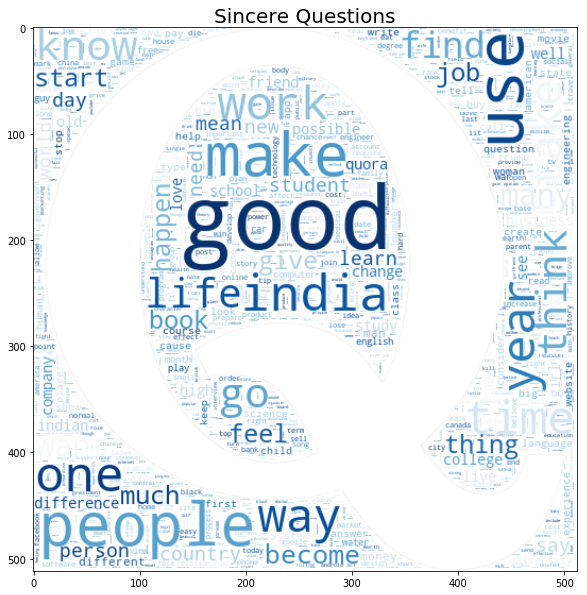

In [23]:
wordcloud_mask(_image_url, _sin_text, "Sincere Questions", "Blues")

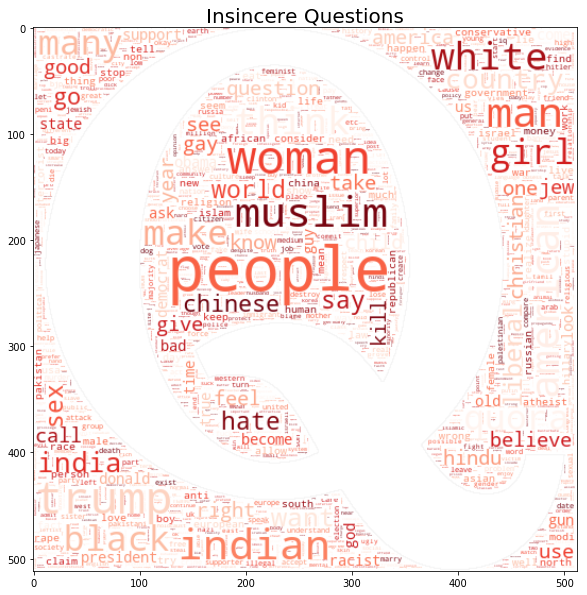

In [24]:
wordcloud_mask(_image_url, _insin_text, "Insincere Questions", "Reds")

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">Modeling</div>
<b>This section is inspired by the source code of [this notebook](https://www.kaggle.com/code/lemonwaffle/quora-pytorch-torchtext). Thanks!</b>

Load the relevant pytorch libraries

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchtext import data
from torchtext import datasets
from torchtext import vocab

import random
import time
from sklearn.metrics import f1_score

In [26]:
SEED = 42
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

## Model Settings

In [27]:
work_dir = "/kaggle/working"

In [28]:
GLOVE_PATH = f"{work_dir}/glove.840B.300d/glove.840B.300d.txt"
MAX_SIZE = 120000
MAX_LEN = 70
SPLIT_RATIO = 0.9
BATCH_SIZE = 512
HIDDEN_DIM = 32
N_LAYERS= 2
BIDIRECTIONAL = True
DROPOUT = 0.5

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

## Data Preparation

### Training Data

In [29]:
ID = data.Field()
TEXT = data.Field(tokenize='spacy')
TARGET = data.LabelField(dtype=torch.float)

train_fields = [('id', None), ('question_text', TEXT), ('target', TARGET)]
test_fields = [('id', ID), ('question_text', TEXT)]

In [30]:
train_data = data.TabularDataset(
    path=f"{data_dir}/quora-insincere-questions-classification/train.csv",
    format='csv',
    skip_header=True,
    fields=train_fields
)
test_data = data.TabularDataset(
    path=f"{data_dir}/quora-insincere-questions-classification/test.csv",
    format='csv',
    skip_header=True,
    fields=test_fields
)
train_data, valid_data = train_data.split(split_ratio=SPLIT_RATIO, random_state=random.seed(SEED))

### Build Vocab

build vocab using Glove embedding

In [31]:
vec = vocab.Vectors(GLOVE_PATH)
TEXT.build_vocab(train_data, vectors=vec, max_size=MAX_SIZE)
TARGET.build_vocab(train_data)
ID.build_vocab(test_data)

100%|█████████▉| 2195504/2196017 [04:26<00:00, 5693.05it/s]

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

## Training

### Batch Settings

In [32]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iter, valid_iter = data.BucketIterator.splits(
    (train_data, valid_data),
    sort_key=lambda x: len(x.question_text), 
    batch_size=BATCH_SIZE,
    device=device
)

test_iter = data.Iterator(
    test_data,
    batch_size=BATCH_SIZE,
    device=device,
    train=False,
    sort=False,
    sort_within_batch=False
)

### Model

In [33]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim,
                 n_layers, bidirectional, dropout):
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim, 
                           hidden_dim, 
                           num_layers=n_layers,
                           bidirectional=bidirectional, 
                           dropout=dropout)
        self.fc = nn.Linear(hidden_dim*2, output_dim)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        embedded = self.dropout(self.embedding(x))
        output, (hidden, cell) = self.rnn(embedded)
        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1))
        return self.fc(hidden.squeeze(0))

In [34]:
emb_shape = TEXT.vocab.vectors.shape
INPUT_DIM = emb_shape[0]
EMBEDDING_DIM = emb_shape[1]
OUTPUT_DIM = 1
model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT)
_ = model.embedding.weight.data.copy_(TEXT.vocab.vectors)

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

### Run

In [35]:
optimizer = optim.Adam(model.parameters()) # optimizer
criterion = nn.BCEWithLogitsLoss() # loss function
model = model.to(device)
criterion = criterion.to(device)

In [36]:
def train(model, iterator, optimizer, criterion):
    epoch_loss = 0
    model.train()
    for batch in iterator:
        optimizer.zero_grad()
        predictions = model(batch.question_text).squeeze(1)
        loss = criterion(predictions, batch.target)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    return epoch_loss / len(iterator)

In [37]:
def evaluate(model, iterator, criterion):
    epoch_loss = 0
    model.eval()
    with torch.no_grad():
        for batch in iterator:
            predictions = model(batch.question_text).squeeze(1)
            loss = criterion(predictions, batch.target)
            epoch_loss += loss.item()
    return epoch_loss / len(iterator)

In [39]:
N_EPOCHS = 4
start_time = time.time()
for epoch in range(N_EPOCHS):
    epoch_start_time = time.time()
    train_loss = train(model, train_iter, optimizer, criterion)
    valid_loss = evaluate(model, valid_iter, criterion)
    print(f'| Epoch: {epoch+1:02} '
          f'| Train Loss: {train_loss:.3f} '
          f'| Val. Loss: {valid_loss:.3f} '
          f'| Time taken: {time.time() - epoch_start_time:.2f}s'
          f'| Time elapsed: {time.time() - start_time:.2f}s')

| Epoch: 01 | Train Loss: 0.104 | Val. Loss: 0.146 | Time taken: 85.98s| Time elapsed: 85.98s
| Epoch: 02 | Train Loss: 0.096 | Val. Loss: 0.131 | Time taken: 85.86s| Time elapsed: 171.84s
| Epoch: 03 | Train Loss: 0.090 | Val. Loss: 0.143 | Time taken: 86.27s| Time elapsed: 258.11s
| Epoch: 04 | Train Loss: 0.085 | Val. Loss: 0.123 | Time taken: 86.04s| Time elapsed: 344.15s


## Evaluation

In [40]:
valid_pred = []
valid_truth = []
model.eval()
with torch.no_grad():
    for batch in valid_iter:
        valid_truth += batch.target.cpu().numpy().tolist()
        predictions = model(batch.question_text).squeeze(1)
        valid_pred += torch.sigmoid(predictions).cpu().data.numpy().tolist()

In [41]:
tmp = [0,0,0] # idx, cur, max
delta = 0
for tmp[0] in np.arange(0.1, 0.501, 0.01):
    tmp[1] = f1_score(valid_truth, np.array(valid_pred)>tmp[0])
    if tmp[1] > tmp[2]:
        delta = tmp[0]
        tmp[2] = tmp[1]
print('best threshold is {:.4f} with F1 score: {:.4f}'.format(delta, tmp[2]))

best threshold is 0.4900 with F1 score: 0.6490


<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">Conclusion</div>

<div class="alert alert-success" role="alert" style="border-radius:10px">
<ul>
    <li>From the EDA, we found certain trends in insincere questions.</li>
    <ul>
        <li>words length</li>
        <li>sentence length</li>
        <li>punctuation usage</li>
        <li>words usage</li>
    </ul>
    <li>The classification model by pytorch enables the detection of insincere questions with a certain degree of accuracy</li>
</ul>
</div>

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">References</div>
- refenreced notebooks
    - EDA
        - https://www.kaggle.com/code/aryanml007/quora-insincere-eda-lstm-gru-embeddings
    
    - Modeling
        - https://www.kaggle.com/code/arnikaer/pytorch
        - https://www.kaggle.com/code/christofhenkel/how-to-preprocessing-when-using-embeddings
        - https://www.kaggle.com/code/lemonwaffle/quora-pytorch-torchtext
- Pytorch
    - https://pytorch.org/text/stable/index.html
    - https://pytorch.org/docs/stable/index.html

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">Submission</div>

In [42]:
test_pred = []
test_id = []
model.eval()
with torch.no_grad():
    for batch in test_iter:
        predictions = model(batch.question_text).squeeze(1)
        test_pred += torch.sigmoid(predictions).cpu().data.numpy().tolist()
        test_id += batch.id.view(-1).cpu().numpy().tolist()

In [43]:
test_pred = (np.array(test_pred) >= delta).astype(int)
test_id = [ID.vocab.itos[i] for i in test_id]

In [44]:
submission = pd.DataFrame({'qid': test_id, 'prediction': test_pred})
submission.to_csv('/kaggle/working/submission.csv', index=False)

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>